HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

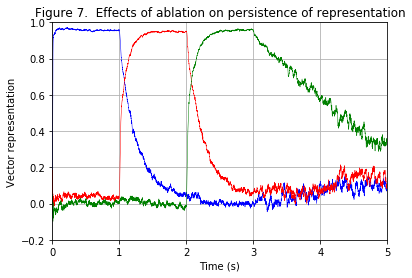

In [1]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
%matplotlib inline
# with and without seed
import numpy as np
import random
import numpy as np
import pickle
d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.1
noise_std = 0.005
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1

with spa.Network() as model:
        
       
        feedback = 1        
 
            
        noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
        timer = time_interval + wait
        vocab = spa.Vocabulary(d)
        vocab.populate('BLUE; RED; GREEN')
        GREEN = vocab.parse('GREEN')
        RED = vocab.parse('RED')
        BLUE = vocab.parse('BLUE')
            
       
        Color = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        
        nengo.Connection(noise,Color.input, synapse = 0.01)
        
        
        def input(t):
                if t < time_interval:
                    return BLUE
                elif t < timer:
                    return '0'
                elif t < timer + time_interval:
                    return RED
                elif t < 2 * timer:
                    return '0'
                elif t < 2 * timer + time_interval:
                    return GREEN
                elif t < 3 * timer:
                    return '0'
                else:
                    return '0'
        
        
        color_trans = spa.Transcode(function = input, output_vocab = vocab)
        color_trans >> Color
        probe_Color = nengo.Probe(Color.output, synapse = 0.01) 
        
        def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000



        
        with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
               
                sim.run(timer * 5.0)  
        
        numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                
       
                 
        pickle.dump(numbers, open("howie_abl_ten", "wb"))
        sally_abl_ten = pickle.load(open("howie_abl_ten", "rb"))
        
        x_values = np.linspace(0,5.0, 5000)        

        plt.figure()
        
        xmin, xmax = 0, 5
        ymin, ymax = -.2, 1.0
        plt.grid(True)   
        plt.title("Figure 7.  Effects of ablation on persistence of representation")
        plt.xlabel("Time (s)")
        plt.ylabel("Vector representation")
        plt.ylim(ymin, ymax)
        plt.xlim(xmin, xmax)
        plt.plot(x_values,sally_abl_ten[:,0],'b-', label = "zero % ablation", linewidth = 0.5 )
        plt.plot(x_values,sally_abl_ten[:,1],'r-', label = "zero % ablation", linewidth = 0.5 )
        plt.plot(x_values,sally_abl_ten[:,2],'g-', label = "zero % ablation", linewidth = 0.5 )
        
        
                                                       
        
        
